In [1]:
import os
import skimage.io as sk
import skimage.transform as trf
import numpy as np

In [2]:
def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,d))]
    
    labels = []
    images = []
    
    for d in directories:
        label_dir = os.path.join(data_dir,d)
        filenames = [os.path.join(label_dir,f) for f in os.listdir(label_dir) if f.endswith(".ppm")]
        
        for f in filenames:
            images.append(sk.imread(f))
            labels.append(int(d))
    return images, labels

In [3]:
root_path=r'C:\Users\deewa\Desktop\Deep Learning Class\DL Basics\Project files'

In [4]:
train_dir = os.path.join(root_path,"Training")
test_dir = os.path.join(root_path, "Testing")

In [5]:
images, labels = load_data(train_dir)

In [7]:
print(images[0])

[[[210 249 232]
  [204 249 208]
  [197 198 155]
  ...
  [ 51  60  40]
  [ 54  64  44]
  [ 57  66  46]]

 [[209 250 236]
  [212 255 217]
  [200 196 156]
  ...
  [ 49  57  38]
  [ 51  59  41]
  [ 53  60  42]]

 [[203 246 236]
  [207 246 213]
  [202 192 156]
  ...
  [ 47  53  35]
  [ 48  54  36]
  [ 48  55  37]]

 ...

 [[  2  22  25]
  [ 26  56  77]
  [ 71 140 159]
  ...
  [ 84  77  50]
  [ 68  66  41]
  [ 56  64  44]]

 [[  0  22  32]
  [ 30  75 106]
  [ 87 176 198]
  ...
  [ 86  80  52]
  [ 68  66  41]
  [ 55  63  42]]

 [[  0  32  50]
  [ 42 101 135]
  [121 217 239]
  ...
  [ 87  80  52]
  [ 70  68  43]
  [ 58  66  46]]]


In [8]:
processed_train_img = [trf.resize(image, output_shape=(64,64), mode='constant') for image in images]

In [9]:
processed_train_img[0]

array([[[0.70190861, 0.82538153, 0.72547823],
        [0.65350509, 0.53167318, 0.38627595],
        [0.51020747, 0.39330241, 0.25058211],
        ...,
        [0.17519579, 0.18775707, 0.12559408],
        [0.1743188 , 0.19825368, 0.13079044],
        [0.17266918, 0.200978  , 0.13811035]],

       [[0.73299632, 0.85369083, 0.77270939],
        [0.69163603, 0.53203412, 0.39500613],
        [0.48066789, 0.3629902 , 0.21881127],
        ...,
        [0.17966213, 0.21041667, 0.13648897],
        [0.17984978, 0.20351084, 0.13346498],
        [0.16574755, 0.18804429, 0.12328431]],

       [[0.74409898, 0.84167193, 0.763523  ],
        [0.65041935, 0.49889706, 0.35643909],
        [0.49674958, 0.34441971, 0.21221996],
        ...,
        [0.19996793, 0.23936744, 0.16467381],
        [0.2       , 0.23002978, 0.16078431],
        [0.1823223 , 0.20431985, 0.14224877]],

       ...,

       [[0.08177754, 0.07697945, 0.03699113],
        [0.05230928, 0.13474983, 0.16441196],
        [0.29456045, 0

In [10]:
np.shape(processed_train_img)

(4575, 64, 64, 3)

In [11]:
np.save(open('train_images_numpy.npy','wb'), processed_train_img)
np.save(open('train_labels_numpy.npy','wb'), labels)

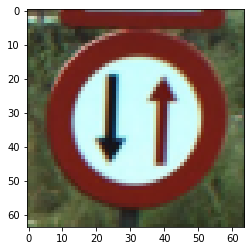

In [12]:
import matplotlib.pyplot as plt
plt.imshow(processed_train_img[1020])
plt.show()

In [13]:
images, labels = load_data(test_dir)
processed_test_img = [trf.resize(image, output_shape=(64,64), mode='constant') for image in images]

In [14]:
np.save(open('test_images_numpy.npy','wb'), processed_test_img)
np.save(open('test_labels_numpy.npy','wb'), labels)